In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as st
import functools


In [41]:
puntos = pd.read_csv('puntosguia4.csv', sep=",", decimal="." , names=('x','y') )
erro_sup = pd.read_csv('errores superiores.csv', sep=",", decimal=".", names=('errx','erry') )
erro_inf = pd.read_csv('errores inferiores.csv', sep=",", decimal=".", names=('errx','erry') )

In [42]:

# https://apps.automeris.io/wpd/
# https://arxiv.org/pdf/astro-ph/0012085.pdf
puntos

,x,y
0,-23.200000,0.000003
1,-23.040000,0.000005
2,-22.900000,0.000018
3,-22.740000,0.000032
4,-22.580000,0.000092
5,-22.440000,0.000124
6,-22.280000,0.000243
7,-22.120000,0.000341
8,-21.945878,0.000518
9,-21.820000,0.000935


In [43]:
#Modelo
def Schechter(phi,x,alp,Mest):
    ym=(0.4*np.log(10.0)*phi*(10**(-0.4*(x-Mest)*(alp+1)))*np.exp(-10**(-0.4*(x-Mest))))
    return(ym)

#probabilidad a priori
#distribuciones uniformes
#ṕor que usa los intervalos de menor o mayor?

def priorr(P,A,M,Pmin,Pmax,Amin,Amax,Mmin,Mmax,n):
    PRO=1.*(P < Pmax) * (P > Pmin) * (A < Amax) * (A > Amin)* (M < Mmax) * (M > Mmin)
    NORM=(Pmax-Pmin)*(Amax-Amin)*(Mmax-Mmin)#aca no falta algo?
    PRO=PRO/NORM
    return(PRO)


#asumiendo errores gausianos calculo likehood
def likehood(x,y,sigma,phi,alp,Mest):
    ym=Schechter(phi,x,alp,Mest)
#    dif=y0-y
#    a=st.norm(loc=0,scale=sigma).pdf(dif)
    a=st.norm(loc=ym,scale=sigma).pdf(y)
    like=a.prod()
    return(like)

#probabilidad posterior
def posterior(x, y, P, A, M, sigma):    
    post = likehood(x, y, sigma, P, A, M) * prior(P,A,M)
    return(post)

#establezco las variables de una exepto el x,y,z
prior = functools.partial(priorr,Pmin=0.0,Pmax=4.0,Amin=-4.0,Amax=0.0,Mmin=-24.0,Mmax=-18.0,n=100)

sigma=abs((erro_sup['erry']-erro_inf['erry'])/2.0)

In [48]:
es = np.array(erro_inf['erry'])
ei = np.array(erro_sup['erry'])

es.sort()
ei.sort()

es= np.array(puntos['y'])-np.array(erro_inf['erry'])
ei= np.array(erro_sup['erry'])-np.array(puntos['y'])


array([1.5489600e-06, 2.6332100e-06, 5.2736000e-06, 6.4973000e-06,
       1.5701400e-05, 2.1174000e-05, 2.5822000e-05, 4.7326000e-05,
       5.8392000e-05, 1.2984100e-04, 1.5572200e-04, 1.8723500e-04,
       2.8246100e-04, 3.6693900e-04, 4.2611700e-04, 5.3325100e-04,
       5.9653100e-04, 6.9273700e-04, 7.7494300e-04, 9.3419700e-04,
       1.0067130e-03, 1.0450560e-03, 1.1690710e-03, 8.5547500e-04,
       1.4093210e-03, 1.4629980e-03, 1.6366080e-03, 1.6366080e-03,
       1.6989420e-03, 1.9729390e-03, 1.7636490e-03, 2.2242180e-03,
       2.7834280e-03, 2.9994910e-03, 3.0542120e-03, 3.2912940e-03,
       3.4166510e-03, 4.4385070e-03, 4.9652170e-03, 6.3059140e-03,
       4.9724300e-03, 5.9942860e-03, 7.7212890e-03, 1.1800860e-02,
       2.0406462e-02, 1.1856306e-02, 2.7868061e-02])

In [56]:
plt.errorbar

<function matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)>

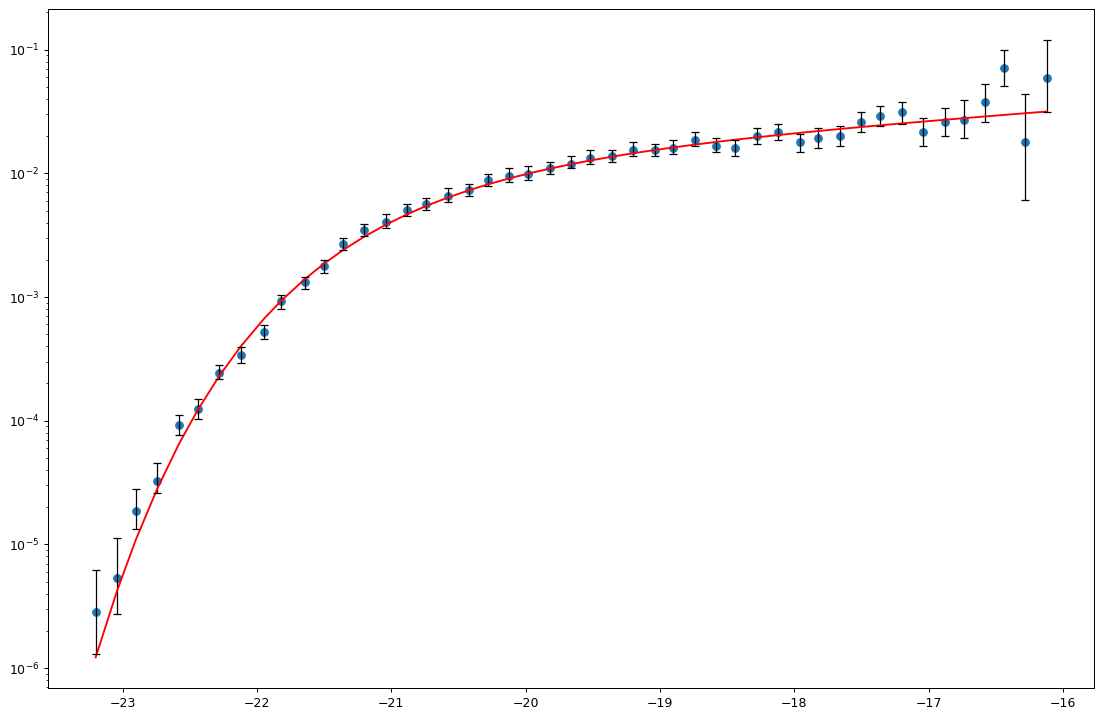

In [75]:
y=Schechter(0.0146,puntos['x'],-1.20,-20.83)
plt.figure(figsize=(15, 10), dpi=90) #dpi es la resolucion
plt.plot(puntos['x'],y,c='red')
plt.scatter(puntos['x'],puntos['y'])
#plt.scatter(puntos['x'],erro_inf['erry'],color='red')
#plt.scatter(erro_sup['errx'],erro_sup['erry'],color='red')
plt.errorbar(puntos['x'],puntos['y'],yerr=(es,ei),fmt='none',marker='o',markersize=1, color='b',ecolor='k',elinewidth=1,capsize=3,linewidth=0.5)
plt.yscale('log')




In [77]:
likehood(puntos['x'],puntos['y'],sigma,0.0146,-1.20,-20.83)


4.529434606468886e+121

In [78]:
Pmin=0.0
Pmax=1.0
Amin=-4.0
Amax=0.0
Mmin=(-24.0)
Mmax=(-18.0)

#defino los sigmas
PhiIn=0.002;AlpIn=0.2;MestIn=1.0
PROPOSAL = functools.partial(np.random.multivariate_normal, cov = [[PhiIn, 0 , 0], [0, AlpIn,0], [0,0,MestIn] ] )

#defino los datos
x=puntos['x']
y=puntos['y']

#CADENA DE MARKOV

Phicamino=[];Alpcamino=[];Mestcamino=[] 
#en mayuscula lo nuevo, en minuscula lo viejo.
#defino valores iniciales
#perdon compu
Npaso=30000
Nquemado=500
phi=0.7
alp=-3.0
mest=-22.0
#probabilidad de donde estoy
post=posterior(x,y, phi, alp, mest, sigma)
#calculo la cadena
for i in range(Npaso):
    #propongo un paso
    PHI,ALP,MEST=PROPOSAL([phi,alp,mest])
    #evaluo la probabilidad ahi
    POST=posterior(x,y, PHI, ALP, MEST, sigma)
    #me fijo si es mayor o menor a donde estoy parado
    if (post==0):
        acept= 1.
    else :
        acept = min(1., POST/post)
    #me fijo si la acepto o no
    RanAcept=np.random.rand()
    
    if (acept>RanAcept):
        phi=PHI
        alp=ALP
        mest=MEST
        post=posterior(x,y, phi, alp, mest, sigma)
    #guardo las variables de cada paso
    Phicamino.append(phi)
    Alpcamino.append(alp)
    Mestcamino.append(mest)
    
phiafuera = Phicamino[:Nquemado]
alpafuera = Alpcamino[:Nquemado]
mestafuera = Mestcamino[:Nquemado]

phidentro = Phicamino[Nquemado:]
alpdentro = Alpcamino[Nquemado:]
mestdentro = Mestcamino[Nquemado:]


/usr/lib64/python3.8/site-packages/scipy/stats/_continuous_distns.py:180: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C
/usr/lib64/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: overflow encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/lib64/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/lib64/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


In [82]:
PHI_M=np.mean(Phicamino)
ALP_M=np.mean(Alpcamino)
MEST_M=np.mean(Mestcamino)

Text(0, 0.5, 'Mest')

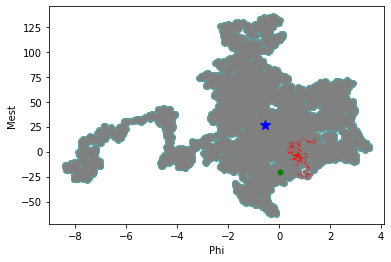

In [83]:
plt.plot(Phicamino, Mestcamino, marker='.',  lw = 0.2, color='gray')
plt.plot(phiafuera, mestafuera, marker='.', markersize=0., lw = 0.2, color='red')
plt.scatter(phidentro, mestdentro, color='cadetblue')
plt.plot(0.0146, -20.83, marker='o', markersize=5, color='g')
plt.plot(PHI_M, MEST_M, marker='*', markersize=10, color='b')
plt.xlabel('Phi')
plt.ylabel('Mest')
#plt.plot(par_a0_out, par_t0_out, marker='.', markersize=0., lw = 0.2, color='red')
#plt.scatter(par_a0_brn, par_t0_brn, color='cadetblue')

In [115]:
plt.plot(Alpcamino, Mestcamino, marker='.',  lw = 0.2, color='gray')
plt.plot(alpafuera, mestafuera, marker='.', markersize=0., lw = 0.2, color='red')
plt.scatter(alpdentro, mestdentro, color='cadetblue')
plt.plot(0.0146, -20.83, marker='o', markersize=5, color='g')
plt.plot(ALP_M, MEST_M, marker='*', markersize=10, color='b')
plt.xlabel('Alp')
plt.ylabel('Mest')
#plt.plot(par_a0_out, par_t0_out, marker='.', markersize=0., lw = 0.2, color='red')
#plt.scatter(par_a0_brn, par_t0_brn, color='cadetblue')

SyntaxError: invalid syntax (<ipython-input-115-77c291b83c11>, line 5)

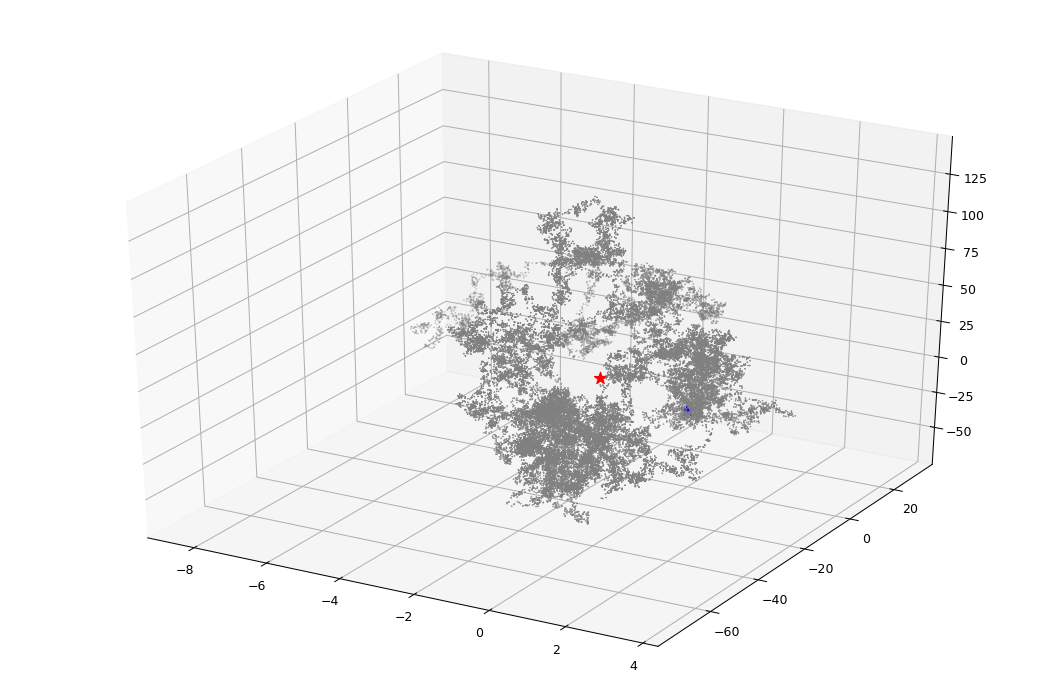

In [120]:
# importamos las librerias necesarias
from mpl_toolkits.mplot3d import axes3d

# Creamos la figura
fig = plt.figure(figsize=(15, 10), dpi=90)
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos de prueba
x = Phicamino
y = Alpcamino
z = Mestcamino

# Agregamos los puntos en el plano 3D
ax1.scatter(0.0146, -1.20, -20.83, s=100,  marker='*', c='BLUE')
ax1.scatter(x, y, z, s=0.1,  marker='*', c='gray')
ax1.scatter(PHI_M, ALP_M, MEST_M, s=100,  marker='*', c='RED')



In [101]:
ax1.scatter?


Signature:
ax1.scatter(
    xs,
    ys,
    zs=0,
    zdir='z',
    s=20,
    c=None,
    depthshade=True,
    *args,
    **kwargs,
)
Docstring:
Create a scatter plot.

Parameters
----------
xs, ys : array-like
     The data positions.
zs : float or array-like, optional, default: 0
    The z-positions. Either an array of the same length as *xs* and
    *ys* or a single value to place all points in the same plane.
zdir : {'x', 'y', 'z', '-x', '-y', '-z'}, optional, default: 'z'
    The axis direction for the *zs*. This is useful when plotting 2D
    data on a 3D Axes. The data must be passed as *xs*, *ys*. Setting
    *zdir* to 'y' then plots the data to the x-z-plane.

    See also :doc:`/gallery/mplot3d/2dcollections3d`.

s : scalar or array-like, optional, default: 20
    The marker size in points**2. Either an array of the same length
    as *xs* and *ys* or a single value to make all markers the same
    size.
c : color, sequence, or sequence of colors, optional
    The marker colo